In [14]:
import json
import requests
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
import pandas as pd
import seaborn as sns 
import itertools
import time

In [15]:
dkrz_identifier_prefix = 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym='
dkrz_service = 'https://cera-www.dkrz.de/WDCC/ui/cerasearch/solr/select?wt=json&fl=entry_acronym_s&q=*%3A*&start=0&rows=1000&fq=entry_type_s%3A%22dataset%22'
max_dataset = 500
fuji_service = 'http://localhost:1071/fuji/api/v1/evaluate'
datasets = []
data_dir = 'results'
oai = 'http://c3grid1.dkrz.de:8080/oai/provider'

In [16]:
metrics = []
try:
    request = requests.get('http://localhost:1071/fuji/api/v1/metrics',headers={'Content-Type': 'application/json'}, auth=('username', 'password'))
    mm = request.json()['metrics']
    for m in mm:
        metrics.append({k: m[k] for k in ('metric_identifier', 'metric_name', 'total_score')})
except requests.exceptions.RequestException as e:
    print(e)
except requests.exceptions.ConnectionError as e1:
    print(e1)

In [17]:
df_metrics = pd.DataFrame.from_dict(metrics)
df_metrics

,metric_identifier,metric_name,total_score
0,FsF-F1-01D,Data is assigned a globally unique identifier.,1
1,FsF-F1-02D,Data is assigned a persistent identifier.,1
2,FsF-F2-01M,Metadata includes descriptive core elements (c...,2
3,FsF-F3-01M,Metadata includes the identifier of the data i...,1
4,FsF-F4-01M,Metadata is offered in such a way that it can ...,2
5,FsF-A1-01M,Metadata contains access level and access cond...,1
6,FsF-A1-02MD,Metadata as well as data are retrievable by th...,2
7,FsF-A2-01M,"Metadata remains available, even if the data i...",1
8,FsF-I1-01M,Metadata is represented using a formal knowled...,2
9,FsF-I1-02M,Metadata uses semantic resources,1


In [18]:
#http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_1075_ds00001
try:
    req = requests.get(dkrz_service)
    raw = req.json()
    hits = raw['response']['docs']
    datasets = [dkrz_identifier_prefix+li['entry_acronym_s'] for li in hits]
except requests.exceptions.RequestException as e:
    print(e)
except requests.exceptions.ConnectionError as e1:
    print(e1)

In [19]:
len(datasets)

1000

In [20]:
datasets[:10]

['http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_1075_ds00001',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_579_ds00003',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_579_ds00004',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_834_ds00049',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_834_ds00050',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_834_ds00051',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_738_ds00004',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_203_ds00001',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_738_ds00005',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_834_ds00048']

In [21]:
import random
datasets = random.choices(datasets, k = max_dataset)

In [22]:
print('Total datasets :', len(datasets))

Total datasets : 500


In [23]:
datasets[:10]

['http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_12H_SRADSU',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_GPH70',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_SX100',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A12_1PTO2X_R1_MM_ACLCAC30',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A11_1PTO4X_R1_MM_SVO700',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A12_1PTO2X_R1_MM_RELHUM850',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=run1_mpiom_data_3d_ym',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A11_1PTO4X_R1_MM_TSLIN',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A12_1PTO2X_R1_MM_STREAM200',
 'http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A12_1PTO2X_R1_MM_APRS']

In [24]:
timestr = time.strftime("%Y%m%d")
timestr

'20200825'

In [25]:
%%time
all_records = []
if len(datasets) == max_dataset:
    for d in datasets:
        req = {'object_identifier':d, 'test_debug':True, 'oaipmh_endpoint':oai}
        r = requests.post(fuji_service, data=json.dumps(req), headers={'Content-Type': 'application/json'}, auth=('marvel', 'wonderwoman'))
        json_data = r.json()
        records = {}
        records['identifier'] = d
        records['result'] = json_data
        all_records.append(records)

Wall time: 24min 43s


In [47]:
file_name = data_dir+'/'+'wdcc_'+timestr+'.json'
with open(file_name, 'w') as f:
    json.dump(all_records, f)

In [48]:
with open(file_name) as json_file:
    data = json.load(json_file)

In [49]:
def get_assessment_result(id):
    jsn = None
    for data_dict in data:
        if data_dict['identifier'] == id:
            jsn = data_dict['result']
    return jsn

In [50]:
get_assessment_result('http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A12_1PTO2X_R1_MM_SVO10')

In [51]:
final = []
for data_dict in data:
    results = {}
    results['identifier'] = data_dict['identifier']
    dd = data_dict['result'] # list of dict
    #print(results['identifier'])
    for d in dd:
        metric_identifier = d['metric_identifier']
        sub_principle = metric_identifier.split('-')[1]
        principle = sub_principle[0]+'_earned'
        principle_total = sub_principle[0]+'_total'
        if not sub_principle in results:
            results[sub_principle] = d['score']['earned']
        else:
            results[sub_principle] += d['score']['earned']
        if not principle in results:
            results[principle] = d['score']['earned']
        else:
            results[principle] += d['score']['earned']
        if not principle_total in results:
            results[principle_total] = d['score']['total']
        else:
            results[principle_total] += d['score']['total']
    final.append(results)

In [52]:
df_results = pd.DataFrame.from_dict(final)

In [53]:
cols = ['identifier','F1','F2','F3','F4','A1','A1','I1','I3','R1','R1.1','R1.2','R1.3','F_earned','F_total','A_earned','A_total','I_earned','I_total','R_earned','R_total']
df_results = df_results[cols]

In [54]:
df_results.head()

,identifier,F1,F2,F3,F4,A1,A1,I1,I3,R1,...,R1.2,R1.3,F_earned,F_total,A_earned,A_total,I_earned,I_total,R_earned,R_total
0,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_12H_SRADSU,1,0,0,1,0,0,2,0,1,...,1,1,2,7,0,1,2,4,3,9
1,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_GPH70,1,0,0,1,0,0,2,0,1,...,1,1,2,7,0,1,2,4,3,9
2,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_SX100,1,0,0,1,0,0,2,0,1,...,1,1,2,7,0,1,2,4,3,9
3,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A12_1PTO2X_R1_MM_ACLCAC30,1,0,0,1,0,0,2,0,1,...,1,1,2,7,0,1,2,4,3,9
4,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A11_1PTO4X_R1_MM_SVO700,1,0,0,1,0,0,2,0,1,...,1,1,2,7,0,1,2,4,3,9


In [55]:
df_results ['F_Principle'] = (df_results ['F_earned'] / df_results ['F_total'] ).round(2)
df_results ['A_Principle'] = (df_results ['A_earned'] / df_results ['A_total'] ).round(2)
df_results ['I_Principle'] = (df_results ['I_earned'] / df_results ['I_total'] ).round(2)
df_results ['R_Principle' ]= (df_results ['R_earned'] / df_results ['R_total']).round(2)

In [56]:
df_results.head()

,identifier,F1,F2,F3,F4,A1,A1,I1,I3,R1,...,A_earned,A_total,I_earned,I_total,R_earned,R_total,F_Principle,A_Principle,I_Principle,R_Principle
0,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_12H_SRADSU,1,0,0,1,0,0,2,0,1,...,0,1,2,4,3,9,0.29,0.0,0.5,0.33
1,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_GPH70,1,0,0,1,0,0,2,0,1,...,0,1,2,4,3,9,0.29,0.0,0.5,0.33
2,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_SX100,1,0,0,1,0,0,2,0,1,...,0,1,2,4,3,9,0.29,0.0,0.5,0.33
3,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A12_1PTO2X_R1_MM_ACLCAC30,1,0,0,1,0,0,2,0,1,...,0,1,2,4,3,9,0.29,0.0,0.5,0.33
4,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A11_1PTO4X_R1_MM_SVO700,1,0,0,1,0,0,2,0,1,...,0,1,2,4,3,9,0.29,0.0,0.5,0.33


In [57]:
df_hist = df_results[['identifier','F_Principle','A_Principle','I_Principle','R_Principle']]
df_hist

,identifier,F_Principle,A_Principle,I_Principle,R_Principle
0,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_12H_SRADSU,0.29,0.0,0.5,0.33
1,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_GPH70,0.29,0.0,0.5,0.33
2,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_SX100,0.29,0.0,0.5,0.33
3,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A12_1PTO2X_R1_MM_ACLCAC30,0.29,0.0,0.5,0.33
4,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A11_1PTO4X_R1_MM_SVO700,0.29,0.0,0.5,0.33
...,...,...,...,...,...
495,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A11_1PTO4X_R1_MM_SD10,0.29,0.0,0.5,0.33
496,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=run10_hamocc_data_2d_mm,0.29,0.0,0.5,0.33
497,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=run14_mpiom_timeser_mm,0.29,0.0,0.5,0.33
498,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=run8_mpiom_data_2d_mm,0.29,0.0,0.5,0.33


In [58]:
df_hist[df_hist.F_Principle <50].iloc[0]

identifier     http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_12H_SRADSU
F_Principle                                                                             0.29
A_Principle                                                                                0
I_Principle                                                                              0.5
R_Principle                                                                             0.33
Name: 0, dtype: object

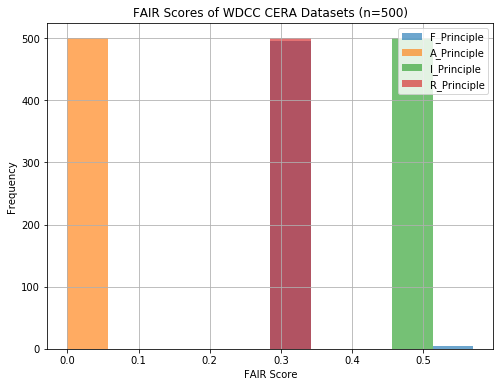

In [59]:
title = "FAIR Scores of WDCC CERA Datasets (n="+str(len(df_hist))+")"
df_hist.plot.hist(sharex=True,sharey=True,alpha=0.65,figsize = (8,6), title=title)
plt.xlabel('FAIR Score')
fig_name = data_dir+'/'+'wdcc_'+timestr+'.png'
plt.savefig(fig_name)

In [60]:
def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(10,10))
    # set palette 
    palette = itertools.cycle(sns.color_palette())
    for i, feature in enumerate(features):
        c = next(palette)
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].plot.hist(bins=20, ax=ax, color=c, range=(0, 1.0))
        ax.set_title("FAIR Score - "+feature+ ' (n=' + str(len(df_hist))+')')
        ax.set(xlabel="Score", ylabel="Frequency")
    fig.subplots_adjust(top=0.8) 
    plt.show()
    fig_name = data_dir+'/'+'sub_wdcc_'+timestr+'.png'
    plt.savefig(fig_name)

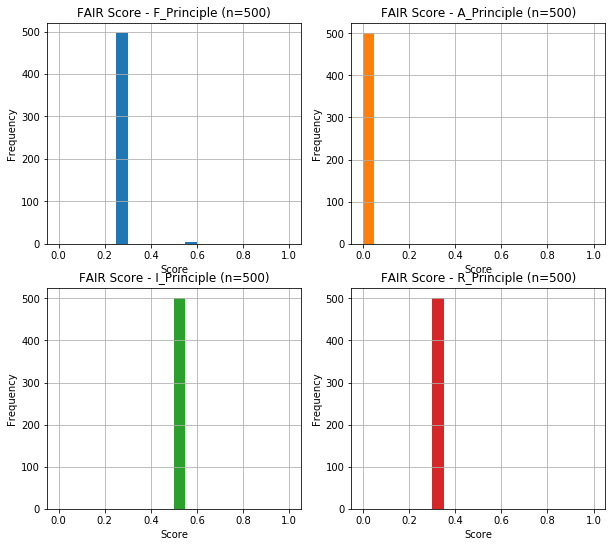

<Figure size 432x288 with 0 Axes>

In [61]:
histograms_plot(df_hist,df_hist.columns[1:],2,2)

In [62]:
pd.set_option('display.max_colwidth', None)

Findability

In [63]:
df_hist[df_hist.F_Principle > 0.5]

,identifier,F_Principle,A_Principle,I_Principle,R_Principle
21,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_738_ds00004,0.57,0.0,0.5,0.33
179,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_834_ds00051,0.57,0.0,0.5,0.33
253,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_834_ds00050,0.57,0.0,0.5,0.33
333,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=DKRZ_LTA_834_ds00050,0.57,0.0,0.5,0.33


In [64]:
df_hist[df_hist.F_Principle < 0.5].head()

,identifier,F_Principle,A_Principle,I_Principle,R_Principle
0,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_12H_SRADSU,0.29,0.0,0.5,0.33
1,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_GPH70,0.29,0.0,0.5,0.33
2,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_SX100,0.29,0.0,0.5,0.33
3,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A12_1PTO2X_R1_MM_ACLCAC30,0.29,0.0,0.5,0.33
4,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A11_1PTO4X_R1_MM_SVO700,0.29,0.0,0.5,0.33


Accessibility

In [65]:
df_hist[df_hist.A_Principle < 0.6].head()

,identifier,F_Principle,A_Principle,I_Principle,R_Principle
0,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_12H_SRADSU,0.29,0.0,0.5,0.33
1,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_GPH70,0.29,0.0,0.5,0.33
2,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_SX100,0.29,0.0,0.5,0.33
3,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A12_1PTO2X_R1_MM_ACLCAC30,0.29,0.0,0.5,0.33
4,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A11_1PTO4X_R1_MM_SVO700,0.29,0.0,0.5,0.33


Interoperability

In [66]:
df_hist[df_hist.I_Principle < 0.6].head()

,identifier,F_Principle,A_Principle,I_Principle,R_Principle
0,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_12H_SRADSU,0.29,0.0,0.5,0.33
1,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_GPH70,0.29,0.0,0.5,0.33
2,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_SX100,0.29,0.0,0.5,0.33
3,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A12_1PTO2X_R1_MM_ACLCAC30,0.29,0.0,0.5,0.33
4,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A11_1PTO4X_R1_MM_SVO700,0.29,0.0,0.5,0.33


Reusability

In [67]:
df_hist[df_hist.R_Principle < 0.5].head()

,identifier,F_Principle,A_Principle,I_Principle,R_Principle
0,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_12H_SRADSU,0.29,0.0,0.5,0.33
1,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_GPH70,0.29,0.0,0.5,0.33
2,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A05_PDCNTRL_R1_MM_SX100,0.29,0.0,0.5,0.33
3,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A12_1PTO2X_R1_MM_ACLCAC30,0.29,0.0,0.5,0.33
4,http://cera-www.dkrz.de/WDCC/ui/Compact.jsp?acronym=A11_1PTO4X_R1_MM_SVO700,0.29,0.0,0.5,0.33
